In [8]:
import pandas as pd

In [9]:
data = []
# world_size = "world size"
world_size = "thread number"
duration = "duration(ns/round)"
template_dict = {
    world_size:0,
    "problem size":0,
    "speed(px/s)":0.0,
    "duration(ns/round)":0.0,
    "rounds":1,
}
filename="pthread-cyclic-14-11-2021-16:46:20.log"
with open(f"../logs/{filename}","r") as f:
    for line in f.readlines():
        if line.find(":") == -1:
            continue
        try:
            key,val = line.rstrip().split(":")
        except ValueError:
            display(line,key,val)
        val = val[1:]
        if key == world_size:
            data.append({})
        data[-1][key] = val
df = pd.DataFrame(data,dtype=float)
display(df[df.isna().any(axis=1)])
# df = df.dropna(axis=1)
df = df.convert_dtypes()
display(df.dtypes)
display(df.head())

,thread number,problem size,duration(ns/round),rounds
12,4.0,10000.0,307266.0,NaN
27,8.0,1000.0,NaN,NaN
47,13.0,1000.0,487220.0,NaN
49,13.0,10000.0,488554.0,NaN
60,16.0,5000.0,NaN,NaN
67,18.0,1000.0,NaN,NaN
76,20.0,10000.0,NaN,NaN
92,24.0,10000.0,NaN,NaN
98,26.0,5000.0,949071.0,NaN
101,26.0,NaN,NaN,NaN


thread number         Int64
problem size          Int64
duration(ns/round)    Int64
rounds                Int64
dtype: object

,thread number,problem size,duration(ns/round),rounds
0,1,1000,669994,10
1,1,5000,673500,10
2,1,10000,670532,10
3,2,200,398905,10
4,2,1000,398418,10


In [10]:
def get_one_core_duration(row,t1_df):
    t1 = t1_df.loc[t1_df["problem size"]==row["problem size"]][duration].values[0]
    return t1/row[duration]
t1_df = df[df[world_size]==1]
display(t1_df)
df["speedup"] = df.apply(get_one_core_duration,args=(t1_df,),axis=1)
display(df.head())

,thread number,problem size,duration(ns/round),rounds
0,1,1000,669994,10
1,1,5000,673500,10
2,1,10000,670532,10


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
tmp_df = df
df=df[df[world_size]<=32]
tmp_df = df[df[world_size].isin(range(1,32,3))]
tmp_df.set_index('problem size', inplace=True)

world size
1     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
16    AxesSubplot(0.125,0.125;0.775x0.755)
19    AxesSubplot(0.125,0.125;0.775x0.755)
22    AxesSubplot(0.125,0.125;0.775x0.755)
25    AxesSubplot(0.125,0.125;0.775x0.755)
28    AxesSubplot(0.125,0.125;0.775x0.755)
31    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration(ns), dtype: object

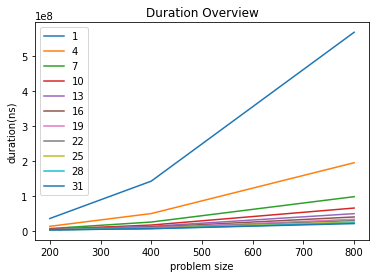

In [ ]:
tmp_df.groupby(world_size)[duration].plot(legend=True,title="Duration Overview",ylabel=duration)

world size
1     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
16    AxesSubplot(0.125,0.125;0.775x0.755)
19    AxesSubplot(0.125,0.125;0.775x0.755)
22    AxesSubplot(0.125,0.125;0.775x0.755)
25    AxesSubplot(0.125,0.125;0.775x0.755)
28    AxesSubplot(0.125,0.125;0.775x0.755)
31    AxesSubplot(0.125,0.125;0.775x0.755)
Name: speedup, dtype: object

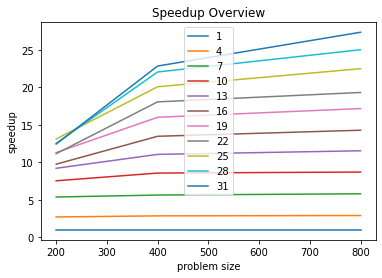

In [ ]:
tmp_df.groupby(world_size)["speedup"].plot(legend=True,title="Speedup Overview",ylabel="speedup")

world size
1     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
16    AxesSubplot(0.125,0.125;0.775x0.755)
19    AxesSubplot(0.125,0.125;0.775x0.755)
22    AxesSubplot(0.125,0.125;0.775x0.755)
25    AxesSubplot(0.125,0.125;0.775x0.755)
28    AxesSubplot(0.125,0.125;0.775x0.755)
31    AxesSubplot(0.125,0.125;0.775x0.755)
Name: speed(px/s), dtype: object

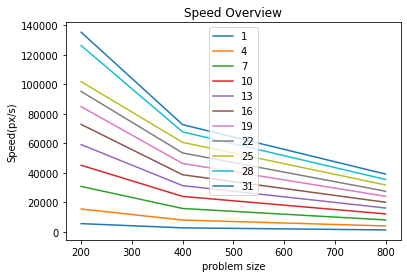

In [ ]:
tmp_df.groupby(world_size)["speed(px/s)"].plot(legend=True,title="Speed Overview",ylabel="Speed(px/s)")

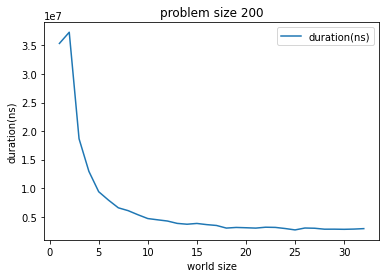

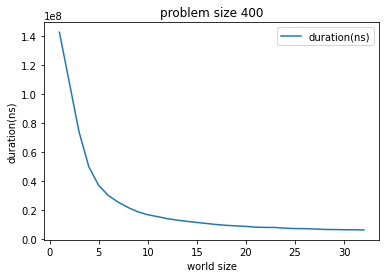

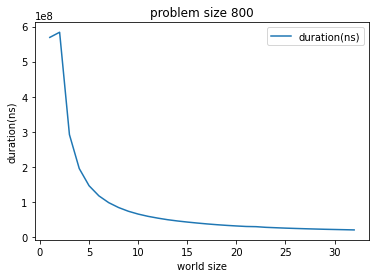

In [ ]:
for input_size, group in df.groupby("problem size"):
    group.plot(x=world_size,y=duration,title=f"problem size {int(input_size)}",ylabel=duration)

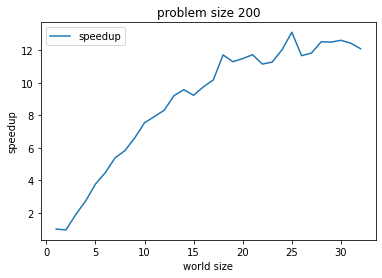

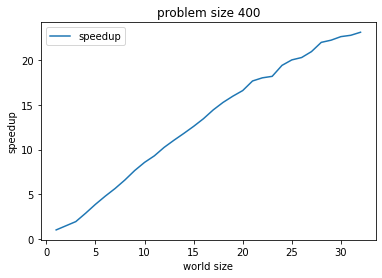

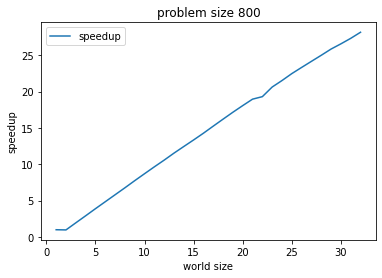

In [ ]:
for input_size, group in df.groupby("problem size"):
    group.plot(x=world_size,y="speedup",title=f"problem size {input_size}",ylabel="speedup")

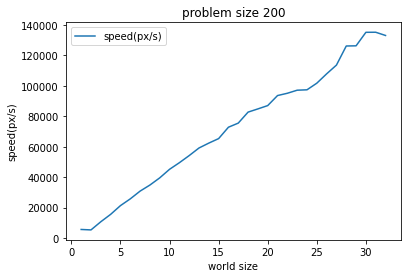

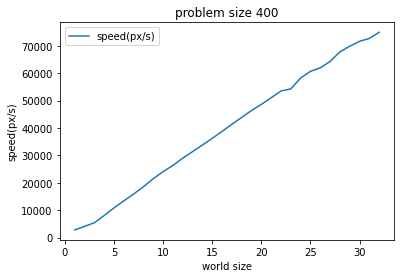

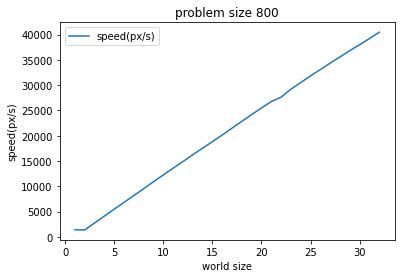

In [ ]:
for input_size, group in df.groupby("problem size"):
    group.plot(x=world_size,y="speed(px/s)",title=f"problem size {input_size}",ylabel="speed(px/s)")

In [ ]:
print(df.loc[lambda x:x["problem size"]==800].to_string())

    world size  problem size  duration(ns)  speed(px/s)    speedup
2            1           800     569162258      1405.58   1.000000
4            2           800     583872412      1370.16   0.974806
7            3           800     292022798      2739.51   1.949034
10           4           800     195221346      4098.14   2.915471
13           5           800     146187228      5472.45   3.893379
16           6           800     117334929      6818.83   4.850749
19           7           800      97966850      8167.60   5.809743
22           8           800      84103224      9514.22   6.767425
25           9           800      73457087     10892.10   7.748228
28          10           800      65384482     12238.10   8.704852
31          11           800      58968103     13572.00   9.652036
34          12           800      53821224     14877.80  10.575052
37          13           800      49330685     16232.80  11.537692
40          14           800      45719815     17525.10  12.44

In [ ]:
# df.loc[lambda x:x[world_size] == 33].to_string()
